In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!ls /content/drive/MyDrive/

'18140 (1).pdf'
'1_Logistic Regression'
'221FA18140 (1).pdf'
 221FA18140.pdf
 6_VGG_FE.ipynb
 6_VGG_FE.json
'a401bb13031da5d2385b1ef5bc635ccc (1).jpg'
 a401bb13031da5d2385b1ef5bc635ccc.jpg
 ANPR_Project
 Ants_Journey_Presentation_Updated.pptx
'a sample large dataset with three independent var....gsheet'
 ASSIGNMENT.gsheet
'A Study On Recruitment.docx'
'A Study On Recruitment(final).docx'
'Batch -01 ML ppt Module -02.pptx'
'Batch 1 (ML).docx'
 best.pt
'certificate it.docx'
 char_classifier.h5
 char_recog.v2i.yolov9
 Classroom
'Colab Notebooks'
'convert that to xl sheet.gsheet'
'Copy of Untitled Diagram.drawio'
 data
 DBMS.drawio
'DBMS Module-2 (unit1)'
'Dimension Table.gdoc'
 DLprojectData
'Document (1).docx'
 Document.docx
'Document from M.Gopi - G1 FSDS'
'download (2).jpeg'
'Facial emotion recognition.v1i.yolov9'
'Facial Expression Detection.v2i.yolov9'
 facial_expression_recognition
'Final_Numpy (2).ipynb'
'Generate the dataset for multiple regression.gsheet'
 groceries_dataset.gshee

In [ ]:
!ls /content/drive/MyDrive/facial_expression_recognition/

best.pt  detect  face_emotion_recognition.pt  FacialExpressionDetection.v2i.yolov9


In [ ]:
!ls /content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [5]:
import os


train_images = "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/train/images"
valid_images = "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/valid/images"
test_images = "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/test/images"

print("Training images:", len(os.listdir(train_images)))
print("Validation images:", len(os.listdir(valid_images)))
print("Testing images:", len(os.listdir(test_images)))

Training images: 798
Validation images: 79
Testing images: 38


In [6]:
train_labels= "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/train/labels"
valid_labels = "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/valid/labels"
test_labels = "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/test/labels"

print("Training labels:", len(os.listdir(train_labels)))
print("Validation labels:", len(os.listdir(valid_labels)))
print("Testing labels:", len(os.listdir(test_labels)))

Training labels: 798
Validation labels: 79
Testing labels: 38


In [ ]:
label_path = "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/train/labels"


label_files = os.listdir(label_path)


if label_files:
    with open(os.path.join(label_path, label_files[0]), "r") as f:
        label_data = f.read()
        print("Label file content:\n", label_data)
else:
    print("No label files found!")

Label file content:
 3 0.45625 0.3234375 0.10390625 0.05078125


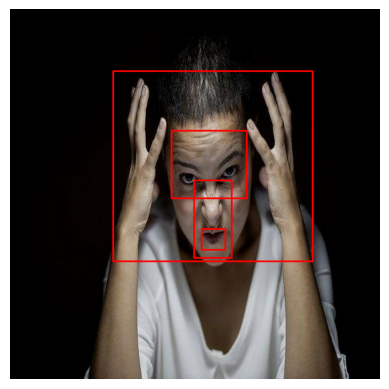

In [ ]:
import cv2
import matplotlib.pyplot as plt


image_path = "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/train/images/1-13-_jpg.rf.10fca455b7cf20d99a9bea25158d6754.jpg"
label_path = "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/train/labels/1-13-_jpg.rf.10fca455b7cf20d99a9bea25158d6754.txt"


image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


with open(label_path, "r") as f:
    labels = f.readlines()


h, w, _ = image.shape
for label in labels:
    data = label.strip().split()
    class_id = int(data[0])
    x_center, y_center, width, height = map(float, data[1:])


    x1 = int((x_center - width / 2) * w)
    y1 = int((y_center - height / 2) * h)
    x2 = int((x_center + width / 2) * w)
    y2 = int((y_center + height / 2) * h)

    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)


plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
import os


img_dir = "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/train/images"
label_dir = "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/train/labels"


img_files = set([f.rsplit('.', 1)[0] for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])
label_files = set([f.rsplit('.', 1)[0] for f in os.listdir(label_dir) if f.endswith('.txt')])


missing_labels = img_files - label_files
missing_images = label_files - img_files

print("❌ Images without labels:", missing_labels)
print("❌ Labels without images:", missing_images)

❌ Images without labels: set()
❌ Labels without images: set()


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:

model = YOLO("yolov9c.pt")
print("YOLOv9 installed successfully!")

100%|██████████| 49.4M/49.4M [00:00<00:00, 116MB/s]


YOLOv9 installed successfully!


In [ ]:
!yolo task=detect \
  mode=train \
  model=yolov9c.pt \
  data="/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/data.yaml" \
  epochs=50 \
  batch=16 \
  imgsz=640 \
  device="cuda"

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

In [ ]:
!cp /content/runs/detect/train/weights/best.pt "/content/drive/MyDrive/facial_expression_recognition/best.pt"


In [ ]:
!mv /content/runs/detect/train/weights/best.pt "/content/drive/MyDrive/facial_expression_recognition/face_emotion_recognition.pt"


In [ ]:
import shutil
import os

# Define source and destination paths
source_path = '/content/runs/detect'  # Copy only the 'detect' folder
destination_path = '/content/drive/MyDrive/facial_expression_recognition/detect'  # Create 'detect' folder inside destination

# Create the destination folder if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Copy the directory
shutil.copytree(source_path, destination_path, dirs_exist_ok=True)  # Merge with existing content

print(f"Successfully copied '{source_path}' to '{destination_path}'")

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect'

In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/facial_expression_recognition/detect/train/weights"))


['last.pt']


In [ ]:
import os
file_path = "/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/test/images/1-10-_jpg.rf.cc024038a5992a36258bb576f4878d21.jpg"
print("File Exists:", os.path.exists(file_path))

File Exists: True


In [ ]:
!yolo detect predict model=/content/drive/MyDrive/facial_expression_recognition/best.pt source=/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/test/images/1-10-_jpg.rf.cc024038a5992a36258bb576f4878d21.jpg

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv9c summary (fused): 156 layers, 25,323,103 parameters, 0 gradients, 102.3 GFLOPs

image 1/1 /content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/test/images/1-10-_jpg.rf.cc024038a5992a36258bb576f4878d21.jpg: 640x640 1 Natural, 2 Sads, 3631.0ms
Speed: 8.7ms preprocess, 3631.0ms inference, 28.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from IPython.display import Image

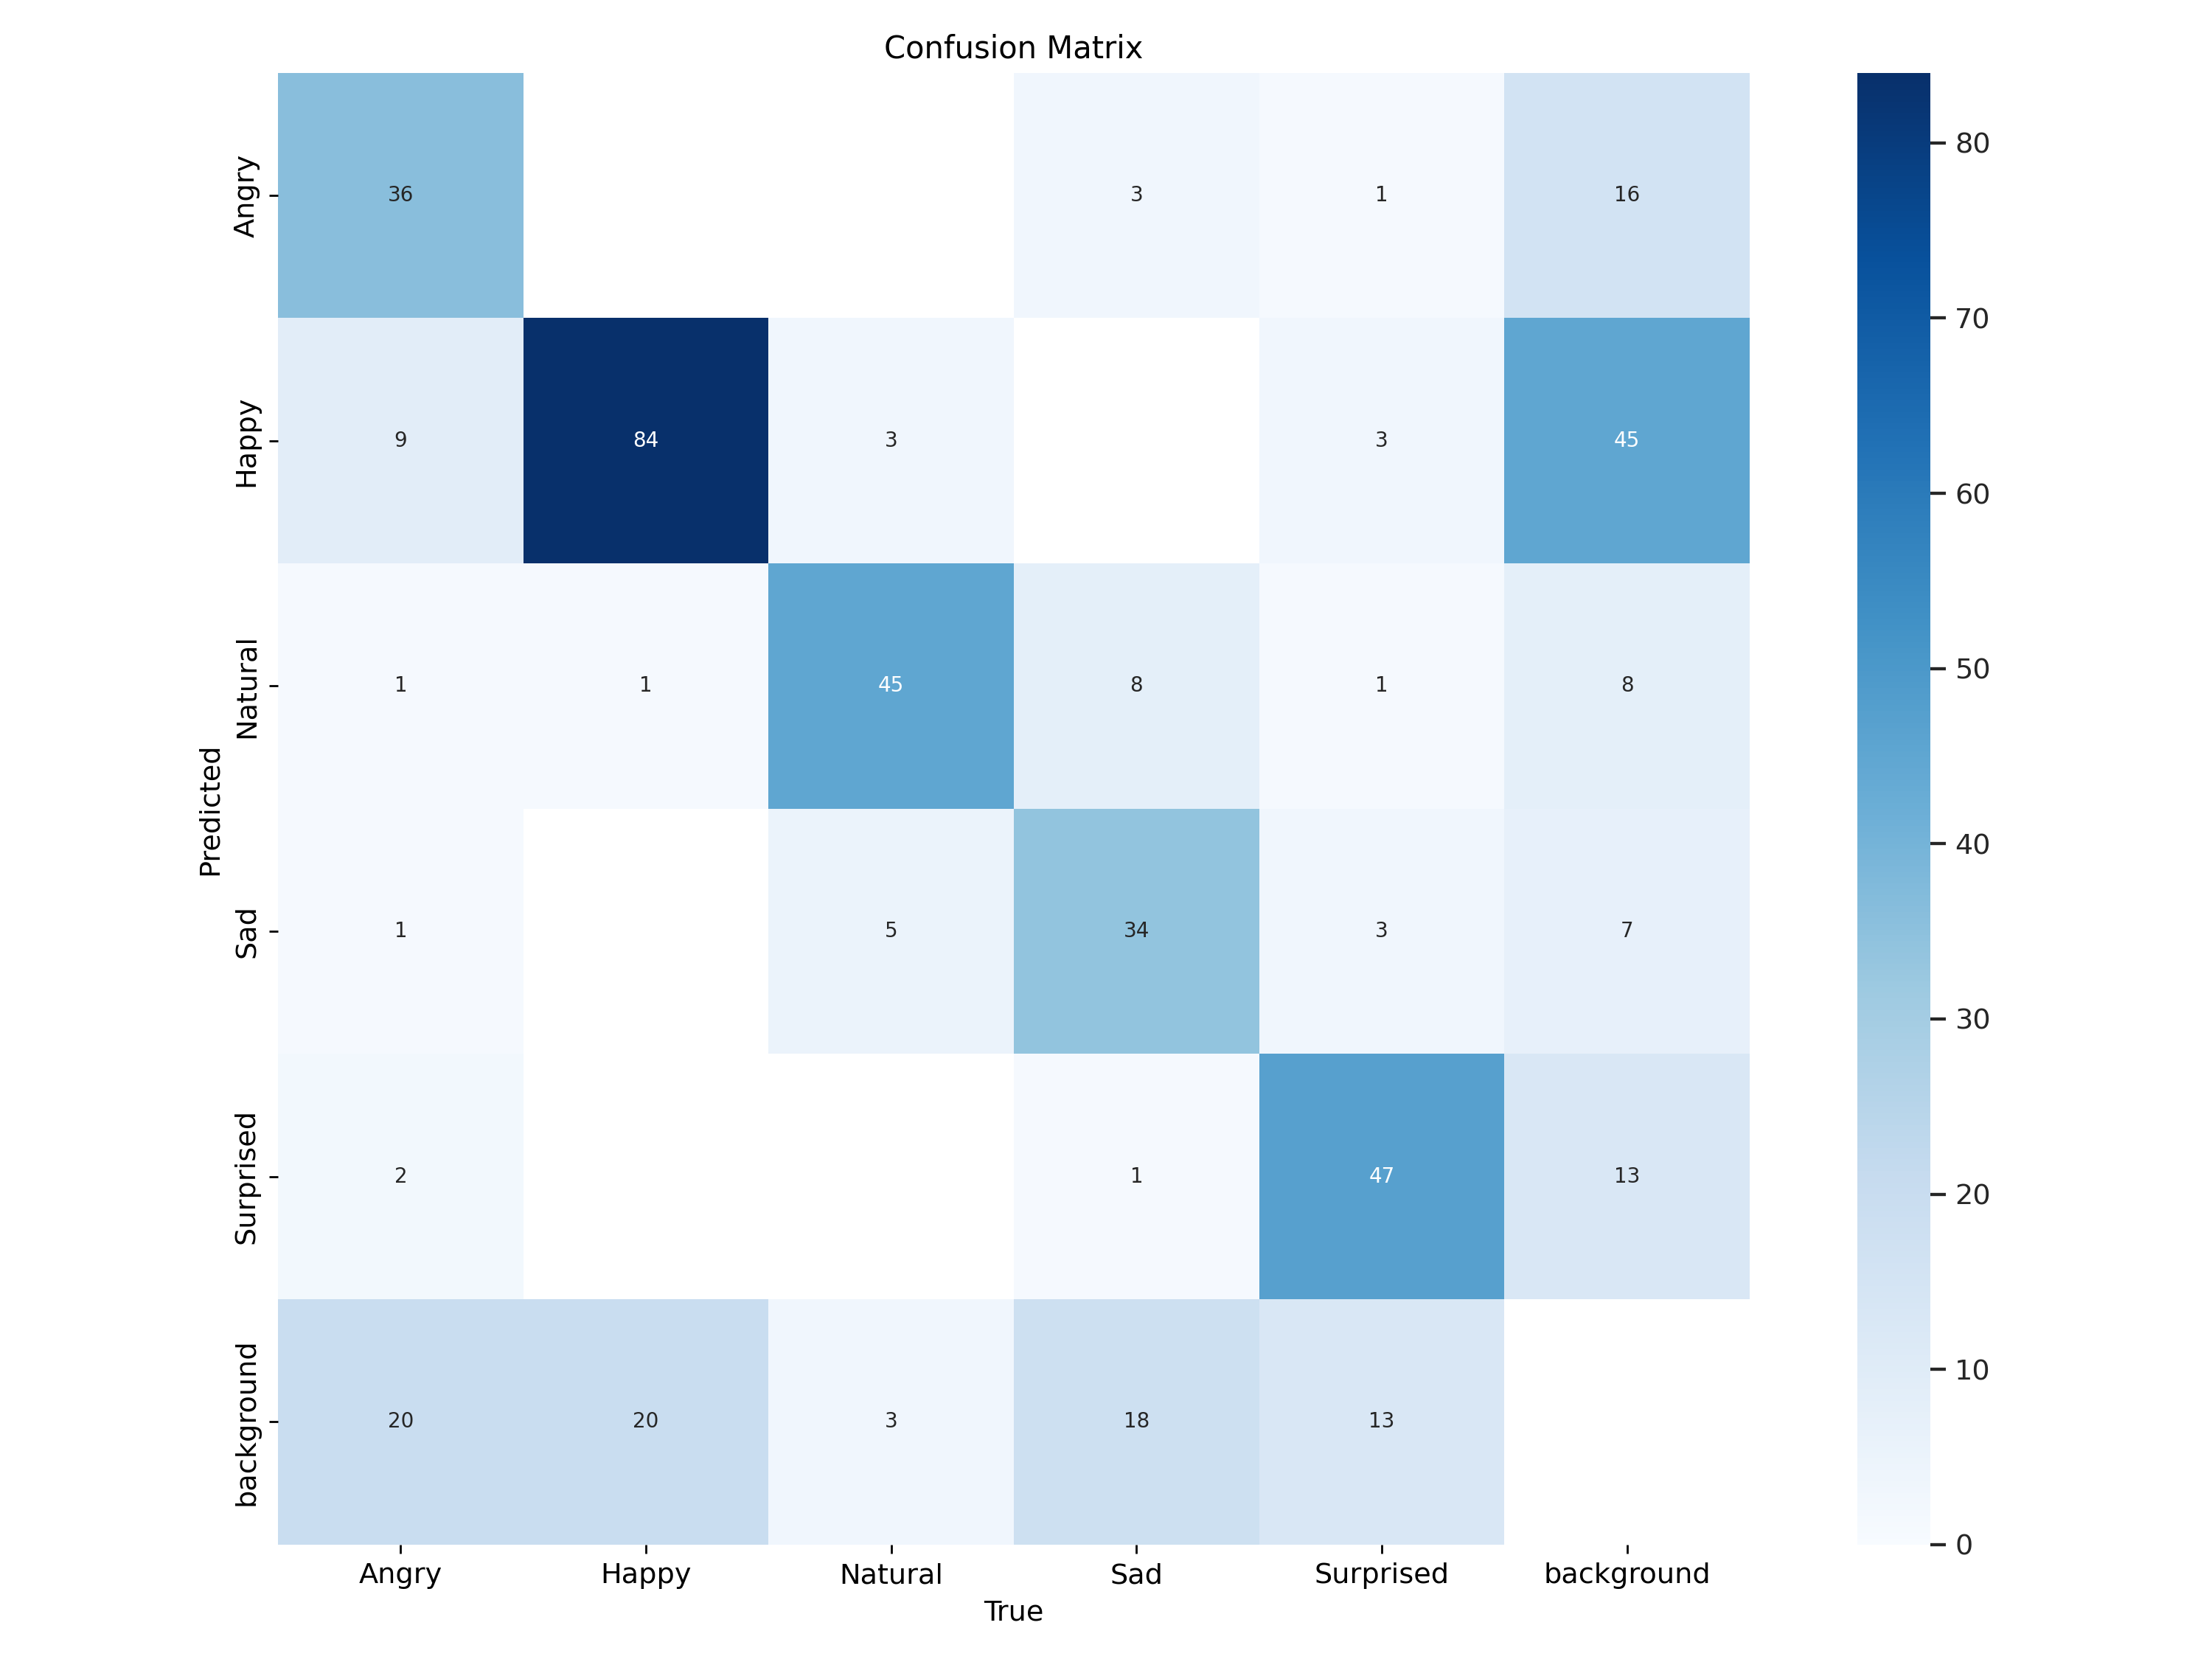

In [ ]:
Image("/content/drive/MyDrive/facial_expression_recognition/detect/train/confusion_matrix.png", width=600)

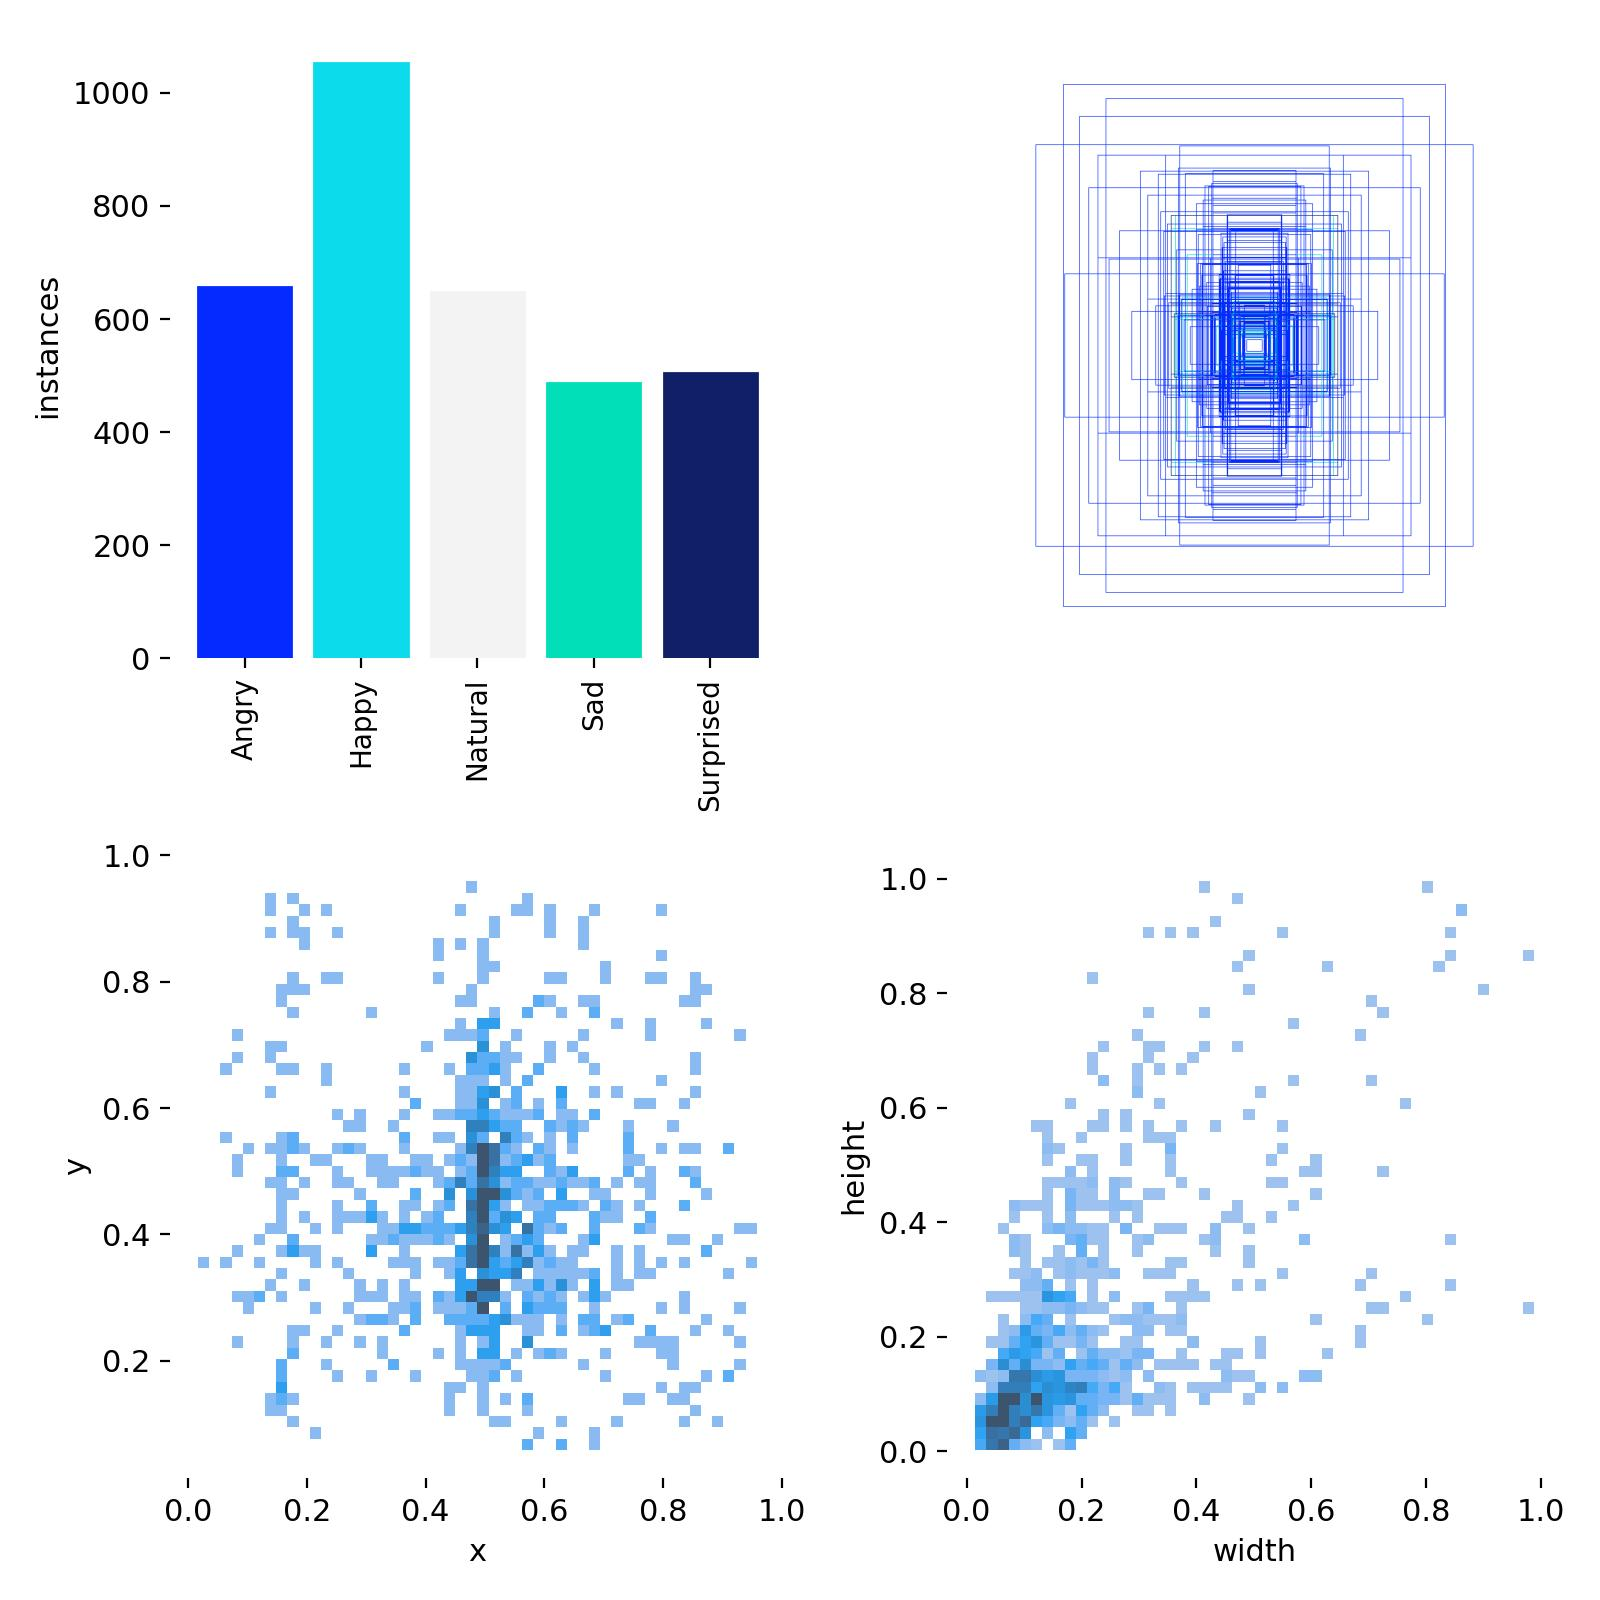

In [ ]:
Image("/content/drive/MyDrive/facial_expression_recognition/detect/train/labels.jpg", width=600)

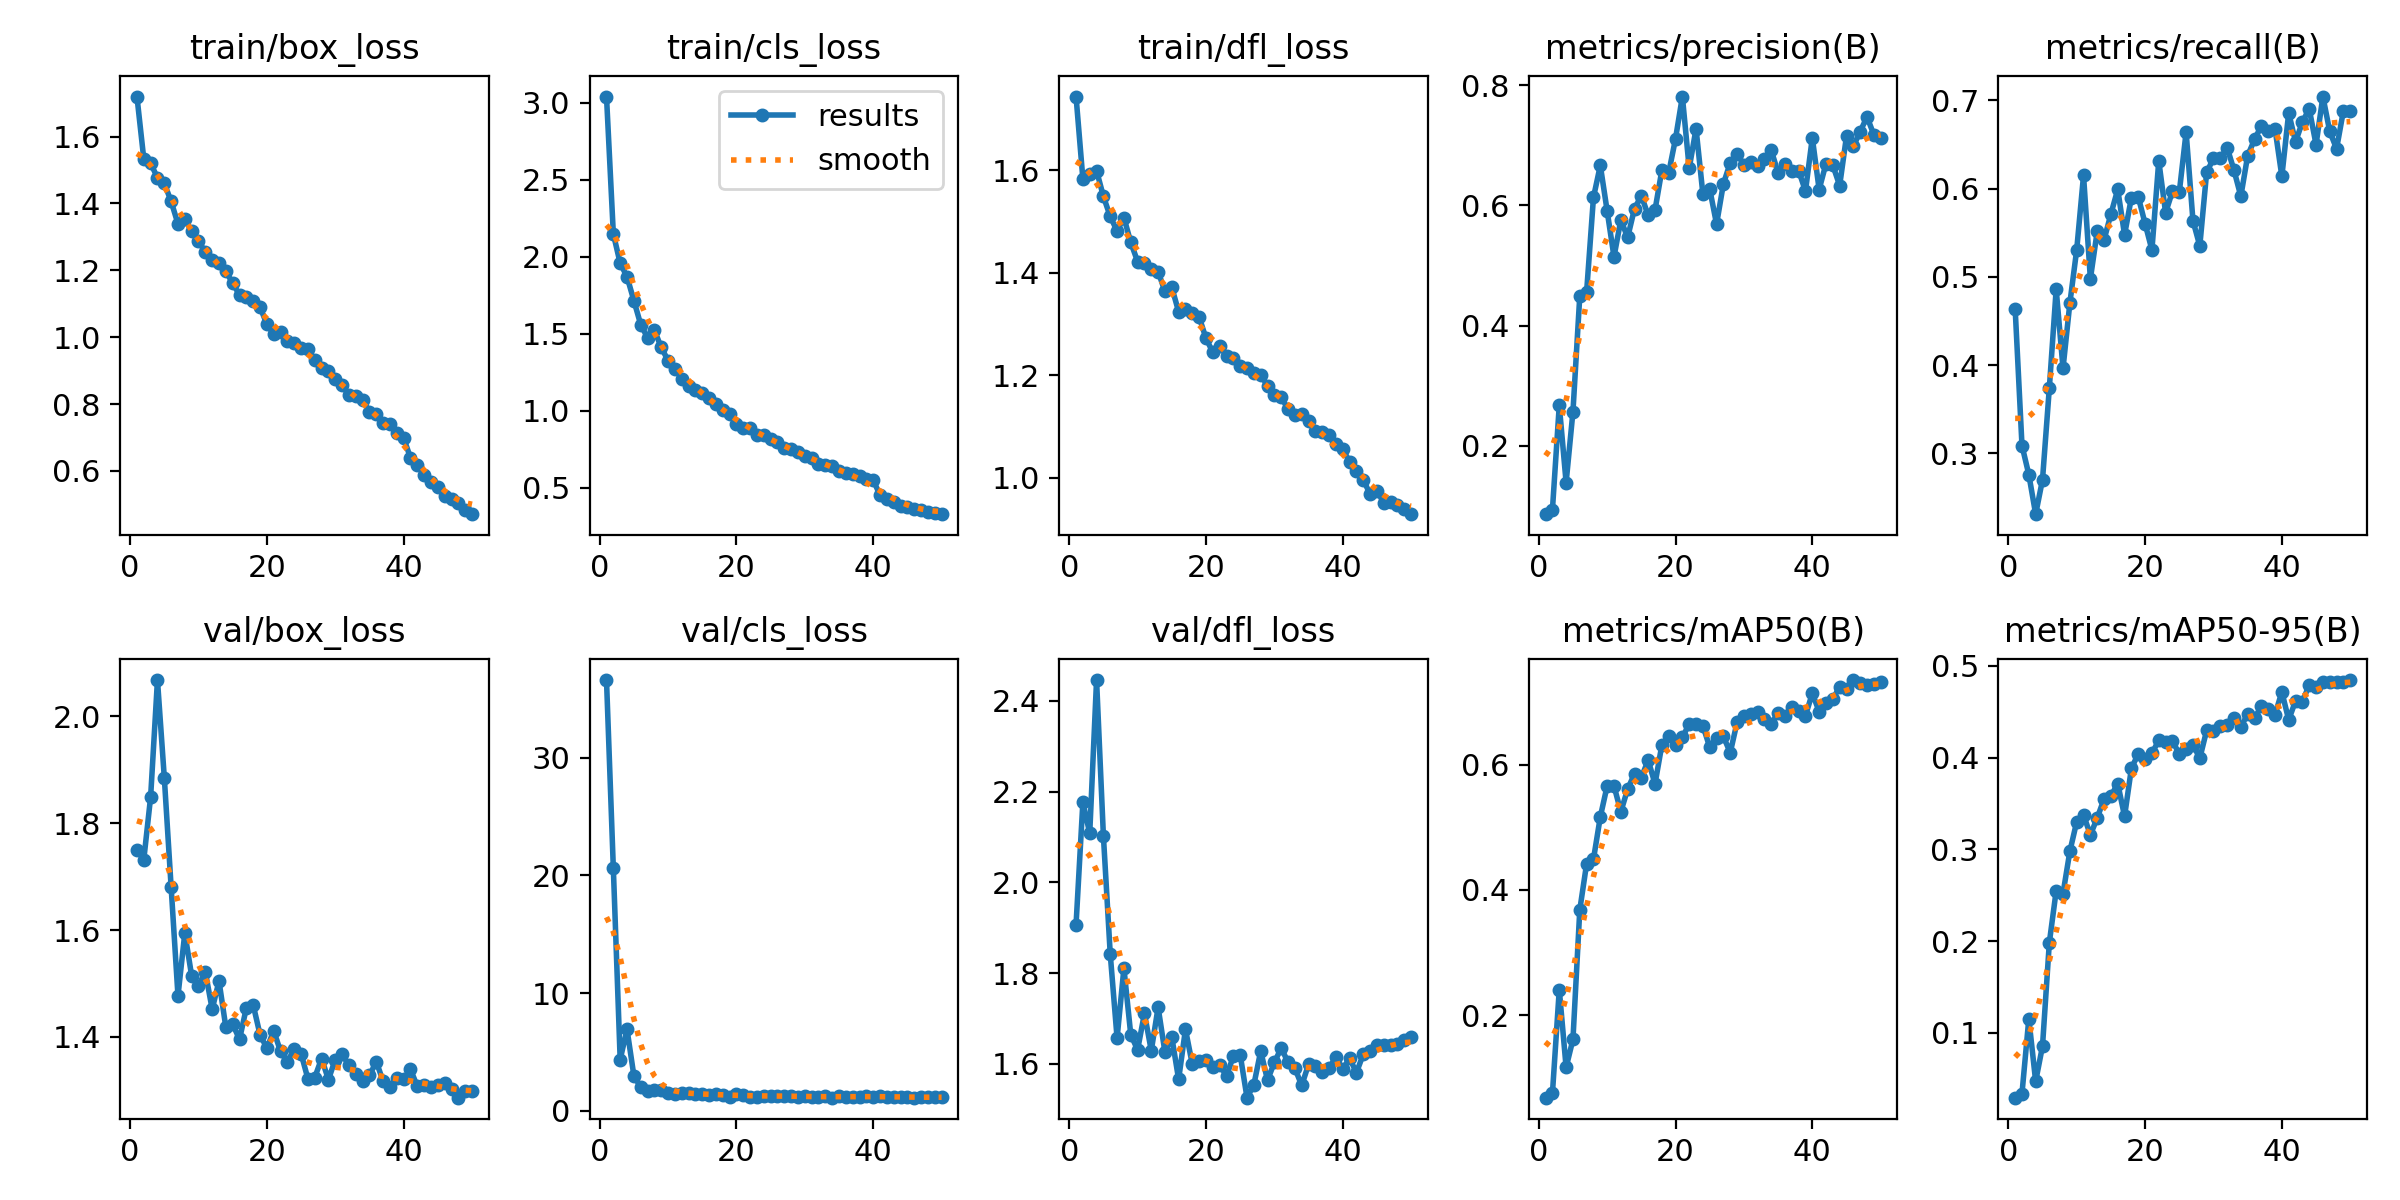

In [ ]:
Image("/content/drive/MyDrive/facial_expression_recognition/detect/train/results.png", width=600)

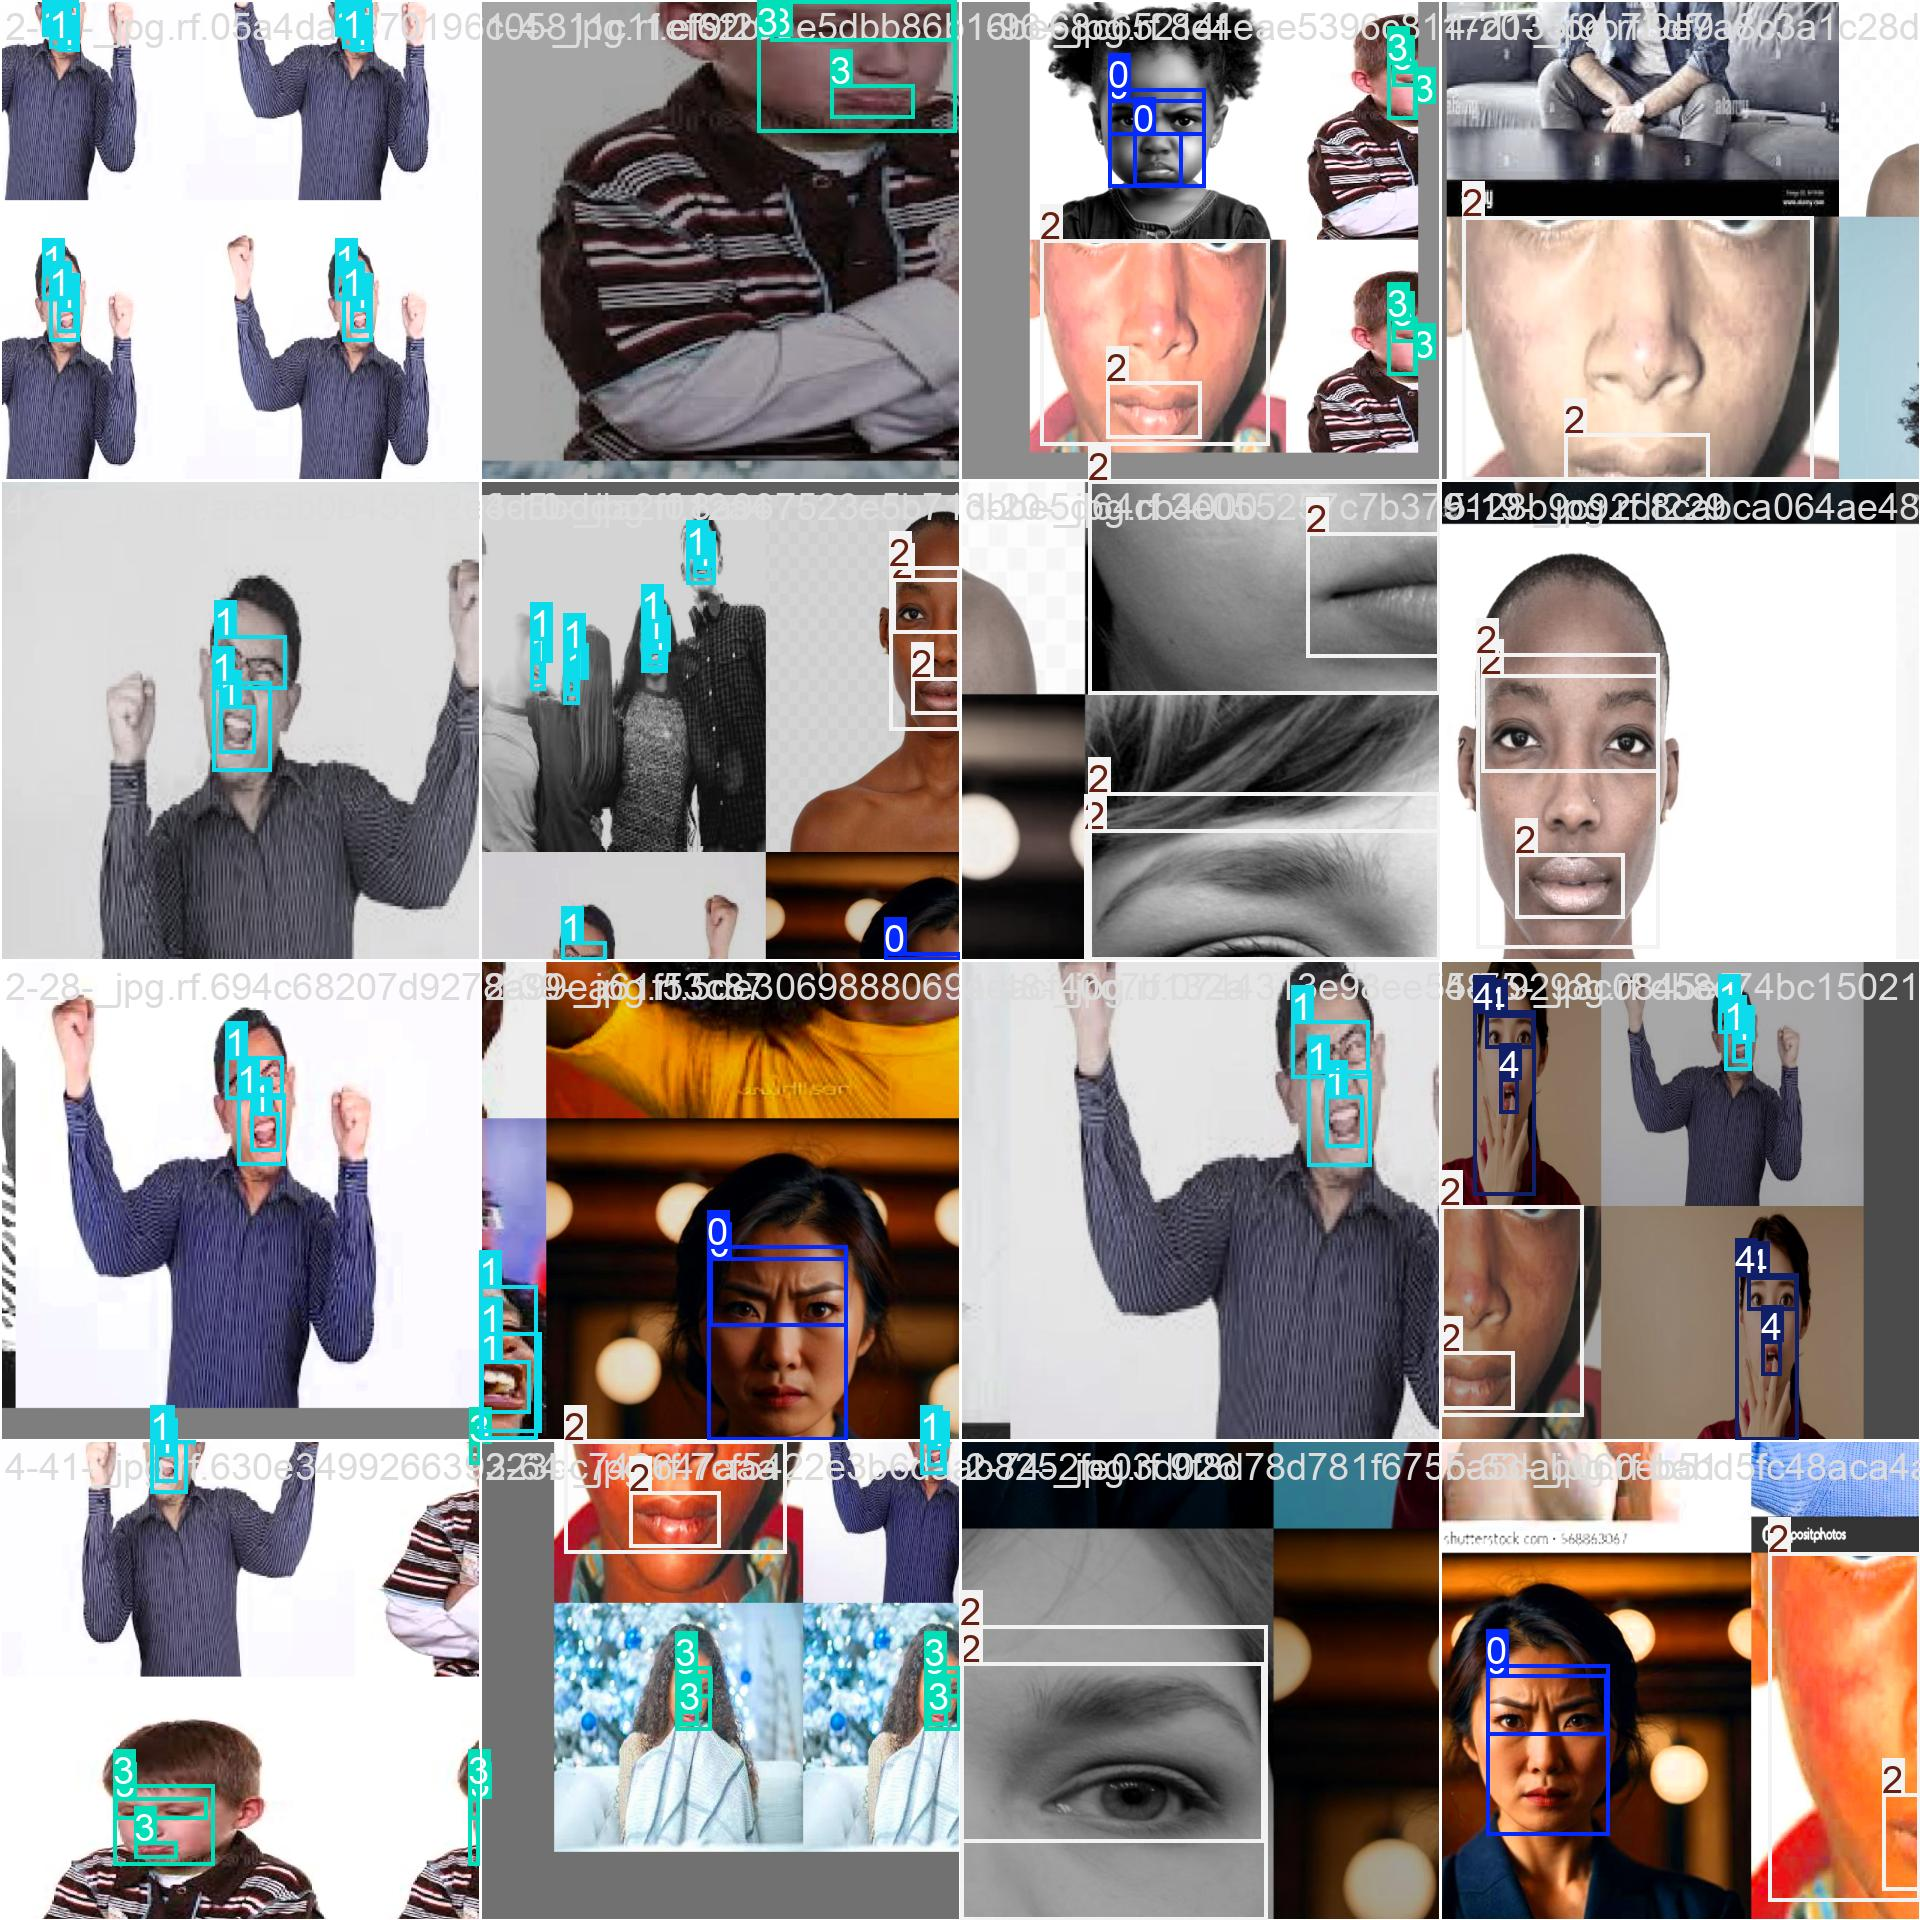

In [ ]:
Image("/content/drive/MyDrive/facial_expression_recognition/detect/train/train_batch0.jpg", width=600)

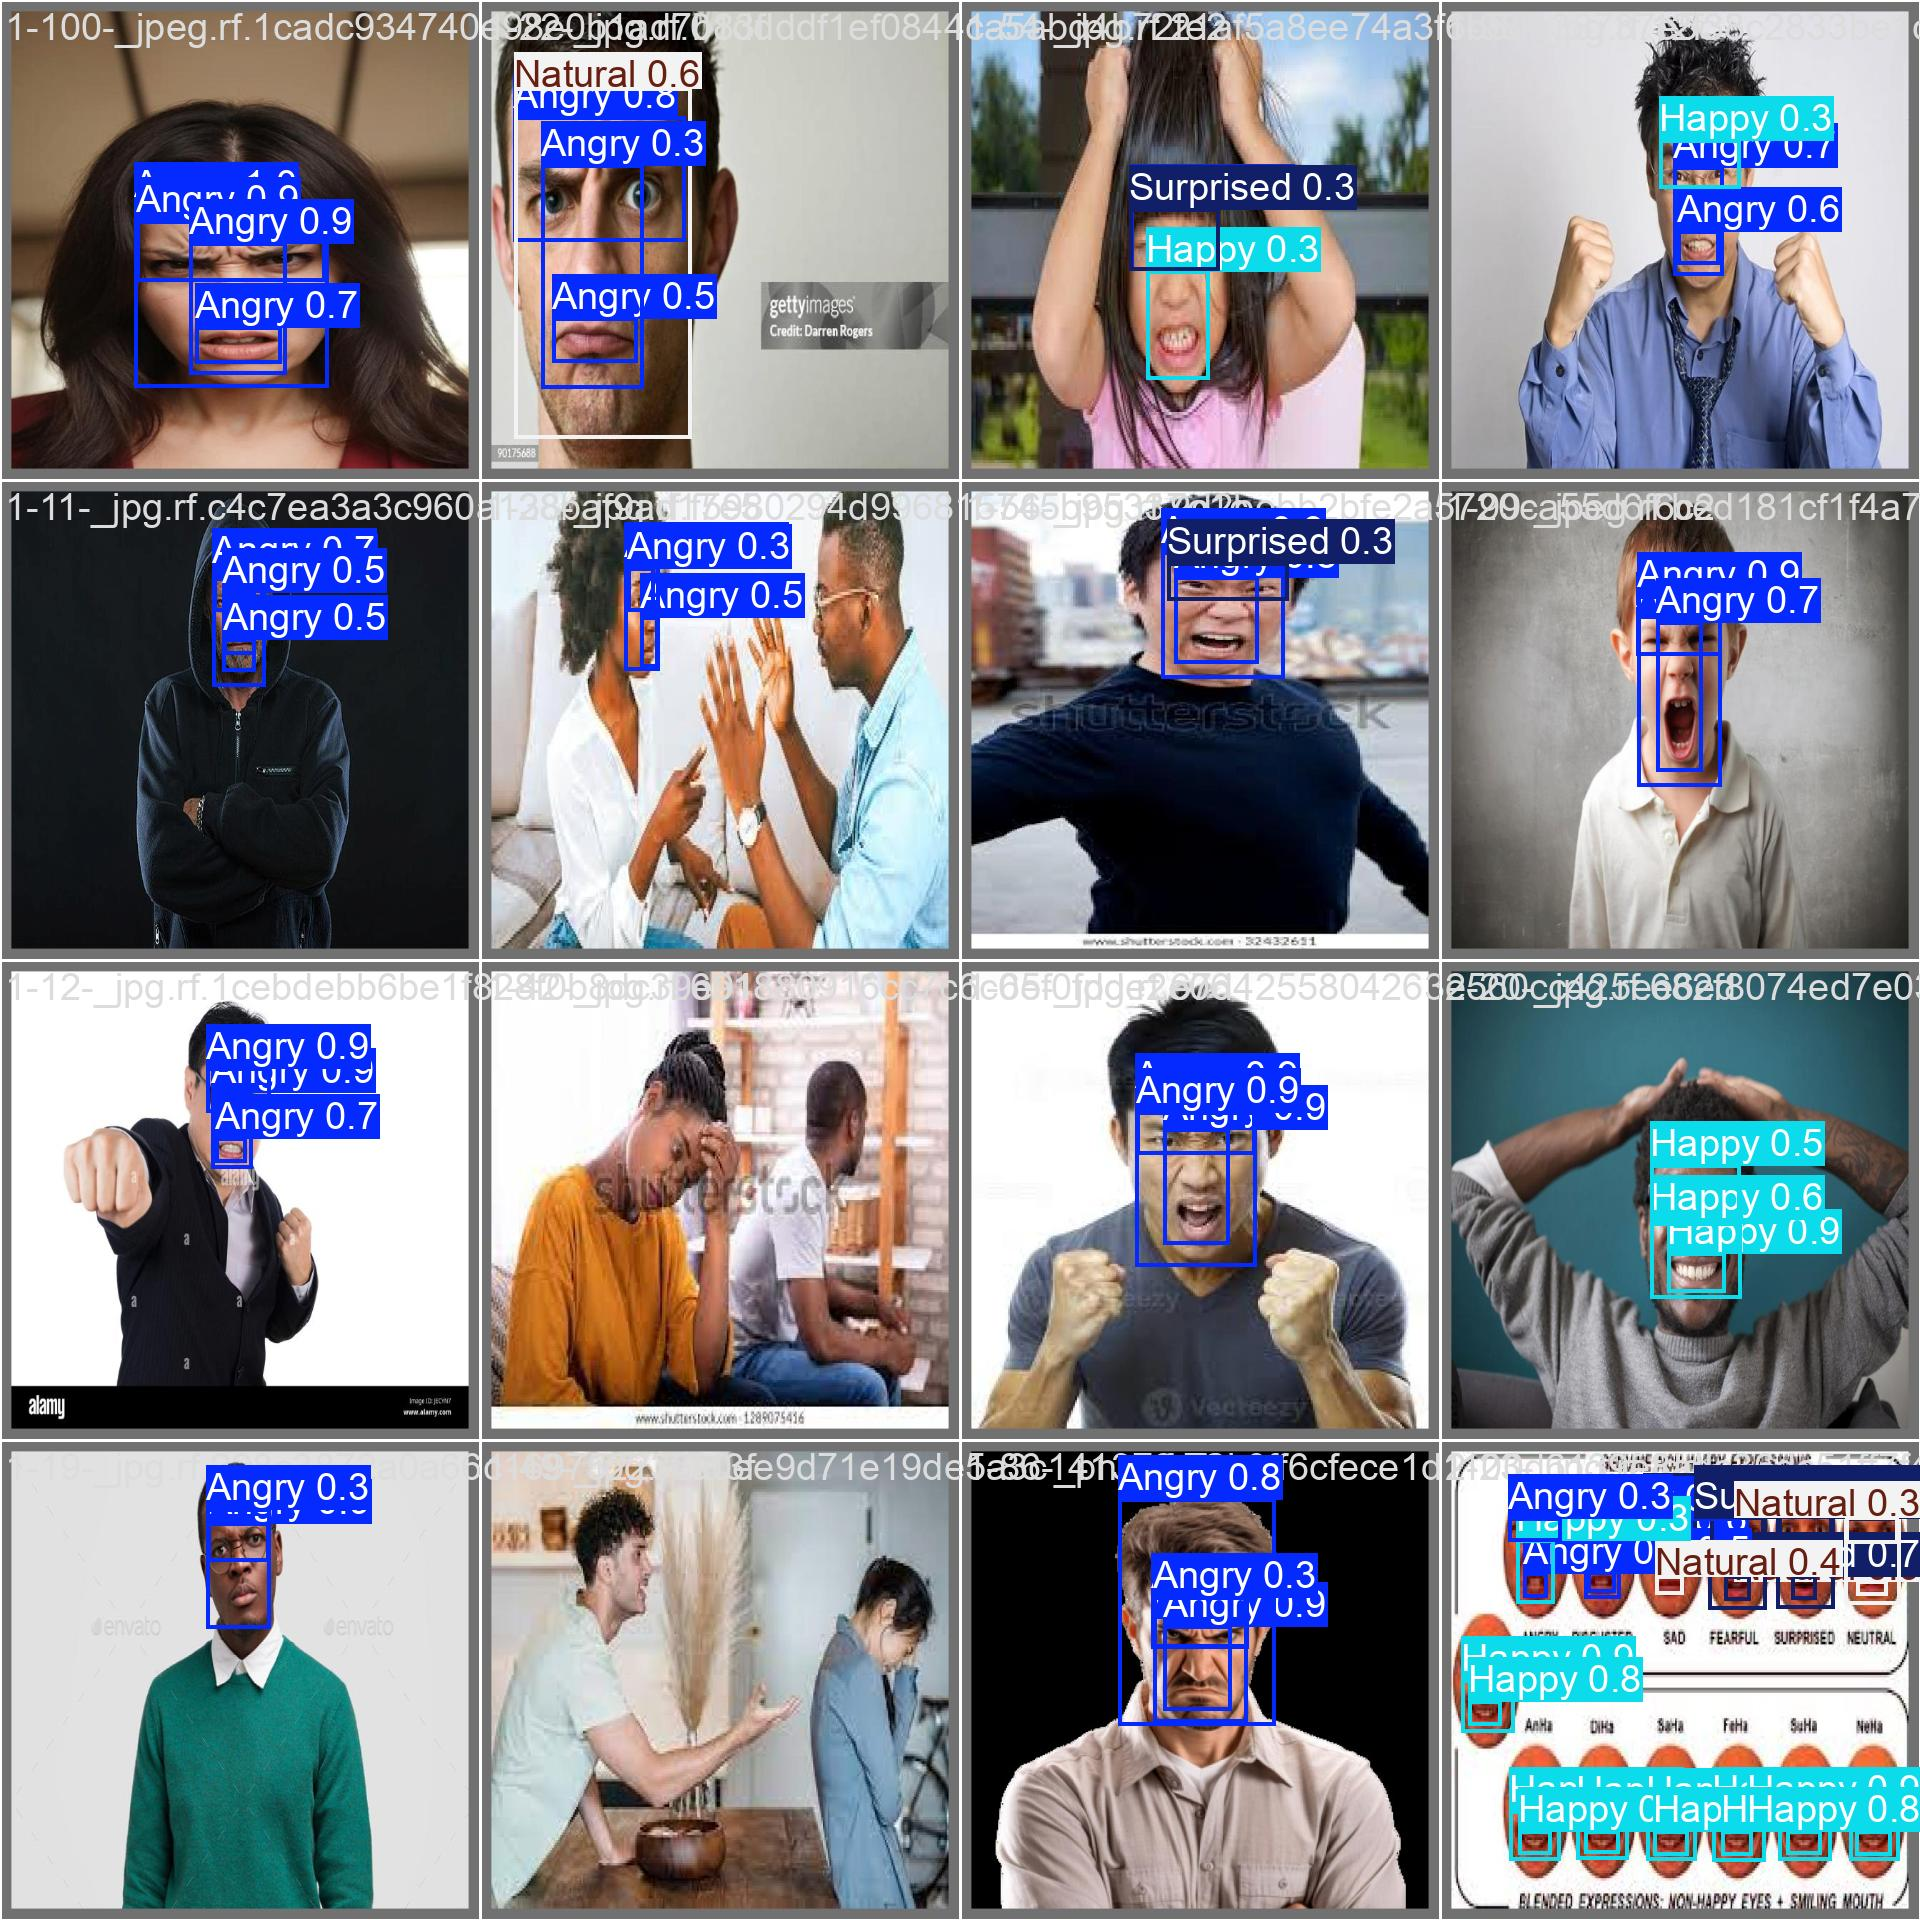

In [ ]:
Image("/content/drive/MyDrive/facial_expression_recognition/detect/train/val_batch0_pred.jpg", width=600)

In [ ]:
!yolo task=detect mode=val model="/content/drive/MyDrive/facial_expression_recognition/best.pt" data="/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/data.yaml"

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv9c summary (fused): 156 layers, 25,323,103 parameters, 0 gradients, 102.3 GFLOPs
100% 755k/755k [00:00<00:00, 18.1MB/s]
val: Scanning /content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/valid/labels.cache... 79 images, 0 backgrounds, 0 corrupt: 100% 79/79 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [04:34<00:00, 54.87s/it]
                   all         79        362      0.711      0.688      0.731      0.486
                 Angry         16         69      0.684      0.536      0.635      0.392
                 Happy         18        105      0.575      0.781      0.715      0.448
               Natural         17         56      0.775      0.857      0.865      0.653
                   Sad         19         64      0.714      0.545      0.637      0.408
             Surprised         19  

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/facial_expression_recognition/best.pt" source="/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/test/images/1-25-_jpg.rf.64f337327086c191deaa54e31f78cfa8.jpg"

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv9c summary (fused): 156 layers, 25,323,103 parameters, 0 gradients, 102.3 GFLOPs

image 1/1 /content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/test/images/1-25-_jpg.rf.64f337327086c191deaa54e31f78cfa8.jpg: 640x640 2 Angrys, 2 Happys, 7 Naturals, 3 Sads, 2 Surpriseds, 2102.5ms
Speed: 6.0ms preprocess, 2102.5ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")


image 1/1 /content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/test/images/1-25-_jpg.rf.64f337327086c191deaa54e31f78cfa8.jpg: 640x640 2 Angrys, 2 Happys, 7 Naturals, 3 Sads, 2 Surpriseds, 48.8ms
Speed: 2.8ms preprocess, 48.8ms inference, 190.9ms postprocess per image at shape (1, 3, 640, 640)


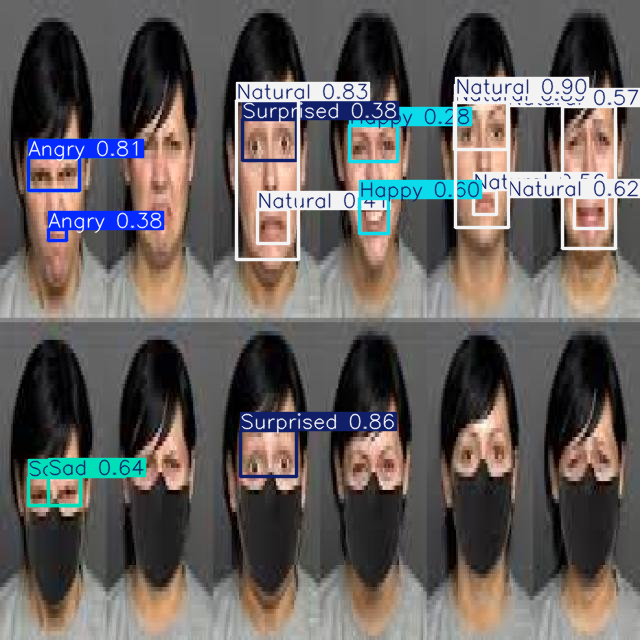

In [ ]:

model = YOLO("/content/drive/MyDrive/facial_expression_recognition/best.pt")


results = model("/content/drive/MyDrive/facial_expression_recognition/FacialExpressionDetection.v2i.yolov9/test/images/1-25-_jpg.rf.64f337327086c191deaa54e31f78cfa8.jpg")


results[0].show()

Saving a.jpeg to a.jpeg

image 1/1 /content/a.jpeg: 416x640 4 Angrys, 1548.1ms
Speed: 4.6ms preprocess, 1548.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


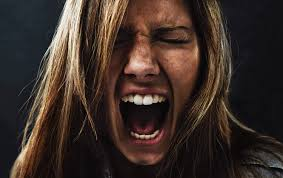

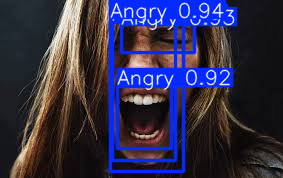

In [ ]:
from ultralytics import YOLO
from google.colab import files
import cv2
from IPython.display import display, Image

# Load the YOLO model
model = YOLO("/content/drive/MyDrive/facial_expression_recognition/best.pt")

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Perform prediction
results = model(image_path)

# Display original image
display(Image(filename=image_path))

# Display the results
results[0].show()